<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# Вакім Джоні КМ-83. Метод Розенброка.

## Зміст

* Зміст
* Постановка задачі
* Теоретичні відомості
  * Функція Розенброка
  * Метод Розенброка
  * Критерії закінчення
* Реалізація методу
  * Імпорт бібліотек
  * Оголошення констант
  * Оголошення функцій
  * Виконання розрахунків та відображення результатів
* Висновки
* Список використаної літератури



## Постановка задачі



Дослідити збіжність методу Розенброка при мінімізації функції  Розенброка в залежності від:
- Значення початкового кроку ‖∆x‖.
- Параметрів методу.
- Вигляду критерію закінчення. 
- Модифікацій методу.

## Теоретичні відомості

### Функція Розенброка

$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$

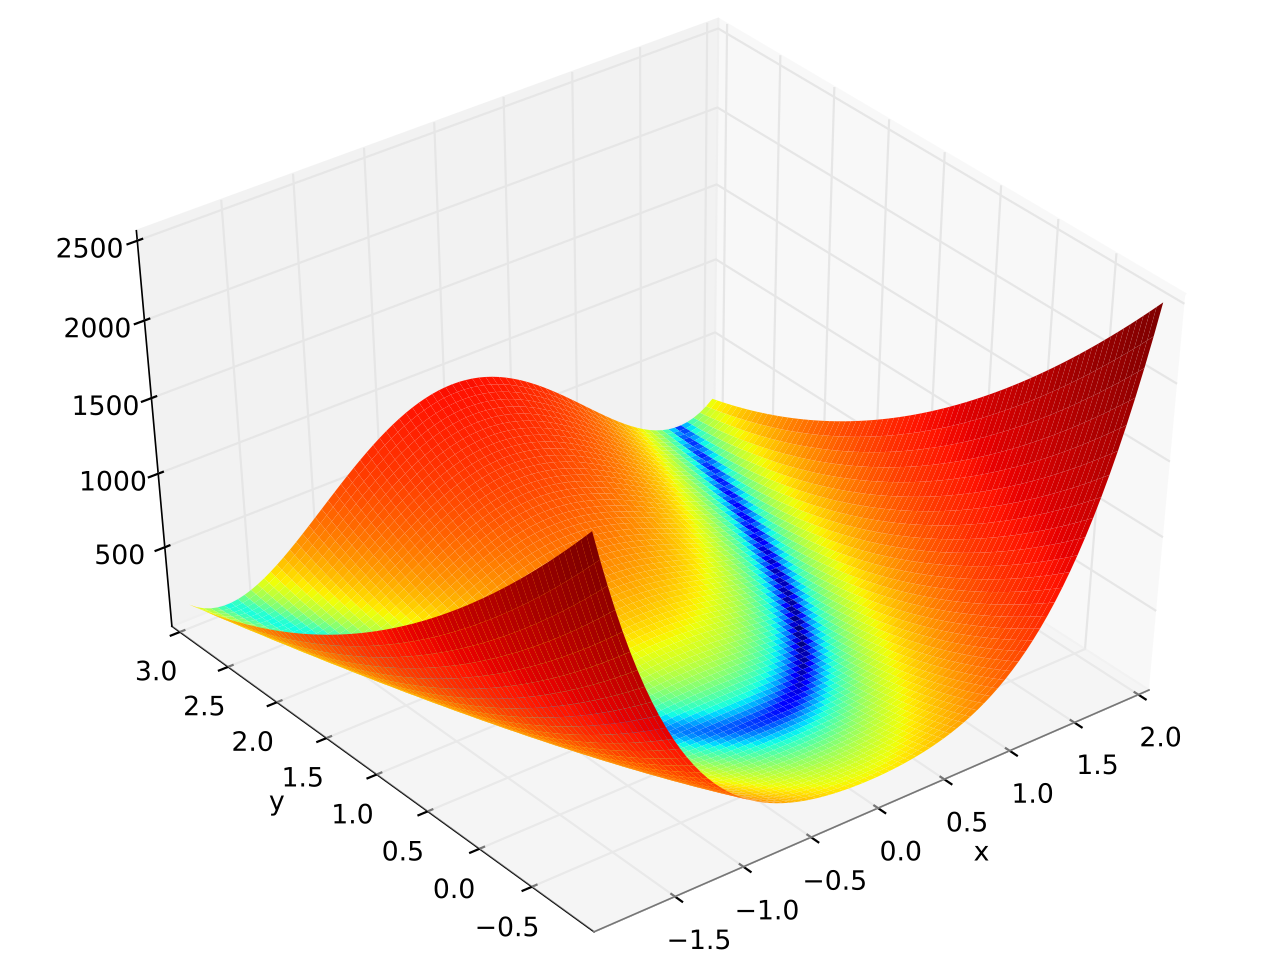

Графік функції Розенброка для двох змінних. Глобальний мінімум перенесений в точку (0,0).

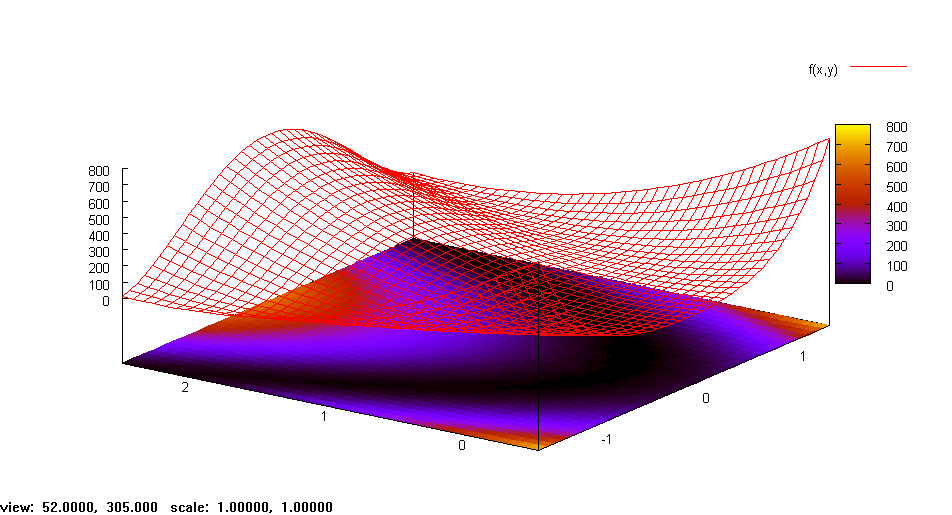

Значення функції Розенброка для двох змінних в околі точки (x, y) = (0,0)

### Метод Розенброка
Метод Розенброка - це алгоритм чисельної оптимізації, який можна застосовувати до завдань оптимізації, в яких цільова функція неважко обчислюється, а похідна або не існує, або не може бути обчислена ефективно. Ідея пошуку Розенброка використовується також для ініціалізації деяких методів чисельного рішення рівнянь, таких як fzero (заснованого на методі Брента) в Matlab. Пошук Розенброка є варіантом пошуку без похідних.
Метод Розенброка має схожість з етапом пошуку методом Хука-Дживса. Однак, замість безперервного пошуку за координатами, які відповідают напрямкам незалежних змінних, після кожного циклу покоординатного пошуку будується нова ортогональна система напрямків пошуку. Причому весь крок попереднього етапу приймається в якості першого блоку при побудові нової системи напрямків.
Метод Розенброка визначає місцезнаходження точки x(k+1), використовуючи послідовні одномірні пошуки, починаючи з вихідної точки x(k), уздовж системи ортогональних напрямків S1(k), S2(k),...,Sn(k).

### Критерії закінчення
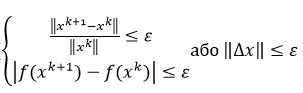

## Реалізація методу

### Імпорт бібліотек

In [15]:
import math
import numpy as np

In [12]:
def func(x):
    global number_func
    number_func = number_func + 1
    return 100 * (x[0]**2 - x[1])**2 + (x[0] - 1)**2

### Оголошення констант

In [13]:
number_func = 0
S1 = [1, 0]
S2 = [0, 1]
x0 = [-1.2, 0]
y0 = func(x0)
epsilon = 0.001
lambda_0 = []
x_r = [x0]
y_r = [y0]
a = 3
b = -0.5
finish = 2

### Оголошення функцій

#### Метод Свена
Ефективність пошуку залежить від величини кроку. Якщо крок великий - отримуємо грубі оцінки координат граничних точок. Якщо крок невеликий - для обчислення граничних точок може знадобитися великий обсяг обчислень.
Пошук послідовності точок відбувається до тих пір, поки значення функції в цих точках зменшується. Коли буде знайдено точка, в якій значення функції перевищує значення функції в попередній точці, здійснюється повернення на половину останнього кроку і обчислюється значення функції в даній точці. Останні чотири точки розташовані один від одного на рівній відстані. Оцінюючи значення функції в цих точках, на основі правила виключення інтервалів визначається інтервал, що містить мінімум заданої функції.

In [14]:
def sven_func(x0, S):
    global s

    x = [x0]
    y = [y0]
    s = 0

    dl = 0.001 * math.sqrt(S[0]**2 + S[1]**2) / (math.sqrt(x0[0]**2 + x0[1]**2))

    f1 = func([x0[0] + dl * S[0], x0[1] + dl * S[1]])
    f2 = func([x0[0] - dl * S[0], x0[1] - dl * S[1]])

    if f1 <= y0:
        s = 1
        x.append([x0[0] + dl * S[0], x0[1] + dl * S[1]])
        y.append(f1)
    elif f2 <= y0:
        s = -1
        x.append([x0[0] - dl * S[0], x0[1] - dl * S[1]])
        y.append(f2)

    dl = s*dl
    while y[-2] >= y[-1]:
        dl = dl*2
        x.append([x[-1][0] + dl * S[0], x[-1][1] + dl * S[1]])
        y.append(func(x[-1]))

    x.append([(x[-1][0] + x[-2][0]) / 2, (x[-1][1] + x[-2][1]) / 2])
    y.append(func(x[-1]))

    n = y.index(min(y))
    if len(x) >= n + 2:
        return [x[n - 1], x[n + 1]]
    else:
        return [x[n - 1], x[n]]

#### Метод золотого перетину
1. На кожному кроці алгоритму виключається 0,382 частина інтервалу.
2. Одна з двох точок послідовно одержуваних інтервалів завжди збігається з іншою точкою з пари точок попереднього інтервалу. Отже, на кожній ітерації потрібно тільки одне обчислення значень функції.
3. Якщо проведено n обчислень значення функції, то довжина отриманого інтервалу дорівнює:
$$L_n = (0.618)^{n-1}*L_0$$

In [16]:
def golden_func(x0,S):
    a = sven_func(x0, S)[0]
    b = sven_func(x0, S)[1]

    L = [abs(b[0] - a[0]), abs(b[1] - a[1])]
    l1 = [a[0] + 0.382 * L[0], a[1] + 0.382 * L[1]]
    l2 = [a[0] + 0.618 * L[0], a[1] + 0.618 * L[1]]
    f1 = func([x0[0] + l1[0] * S[0], x0[1] + l1[1] * S[1]])
    f2 = func([x0[0] + l2[0] * S[0], x0[1] + l2[1] * S[1]])

    while L[0] > epsilon and L[1] > epsilon:
        if f1 > f2:
            a = l1
            b = b
        elif f1 < f2:
            a = a
            b = l2

        L = [abs(b[0] - a[0]), abs(b[1] - a[1])]
        l1 = [a[0] + 0.382 * L[0], a[1] + 0.382 * L[1]]
        l2 = [a[0] + 0.618 * L[0], a[1] + 0.618 * L[1]]
        f1 = func([x0[0] + l1[0]*S[0], x0[1] + l1[1] * S[1]])
        f2 = func([x0[0] + l2[0]*S[0], x0[1] + l2[1] * S[1]])

    return L

#### Метод ДСК-Пауелла
У методі ДСК за методом Свена визначається інтервал, що містить точку мінімуму, тобто перевіряються зростаючі за величиною кроки до тих пір, поки не буде пройдено мінімум. Після визначення інтервалу невизначеності за методом Свен з чотирьох рівновіддалених точок виключається та точка, яка знаходиться далі від точки x, що відповідає
найменшим значенням f(x).

Метод ДСК-Пауелла складається з:
1. етап: (Алгоритм ДСК) Визначення інтервалу, в якому знаходиться мінімум f (x), і одноразове оцінювання функції за допомогою квадратичної апроксимації.
2. етап: (Алгоритм Пауелла). Оцінювання функції за допомогою квадратичної апроксимації до тих пір, поки не буде досягнута необхідна точність (итерационная процедура).

In [17]:
def pauel_func(x0, S):
    l1 = sven_func(x0, S)[0]
    l3 = sven_func(x0, S)[1]
    l2 = [(l1[0] + l3[0]) / 2, (l1[1] + l3[1]) / 2]

    l = [l2]
    f1 = func(l1)
    f2 = func(l2)
    f3 = func(l3)
    y = [f2]

    if f1 <= f3:
        l.append(l1)
        y.append(f1)
        dl = [-abs(l2[0] - l1[0]), -abs(l2[1] - l1[1])]
    elif f1 >= f3:
        l.append(l3)
        y.append(f3)
        dl = [abs(l2[0] - l3[0]), abs(l2[1] - l3[1])]
    l1 = l[0]
    l2 = l[-1]

    while y[-2] > y[-1]:
        if abs(y[-2] - y[-1]) > epsilon:
            dl = [2*dl[0], 2*dl[1]]
            l.append([l2[0] + dl[0], l2[1] + dl[1]])
            y.append(func(l[-1]))
        else:
            break

    l.append([(l[-1][0] + l[-2][0]) / 2, (l[-1][1] + l[-2][1])/2])
    y.append(func(l[-1]))
    n = y.index(min(y))

    return [abs(l[n-1][0] - l[n][0]), abs(l[n-1][1] - l[n][1])]

### Виконання розрахунків та відображення результатів

#### ДСК-Пауелл

In [18]:
n = 1
while True:
    x0 = x_r[-1]
    x_dsk = x0
    y_dsk = y_r[-1]
    lambda_0 = [pauel_func(x0,S1)[0], pauel_func(x0,S2)[1]]

    n = 2
    while True:
        expression = func([x_dsk[0] + S2[0] * lambda_0[1], x_dsk[1] + S2[1] * lambda_0[1]])
        if expression <= y_dsk:
            y_dsk = expression
            x_dsk = [x_dsk[0] + S2[0] * lambda_0[1], x_dsk[1] + S2[1] * lambda_0[1]]
            lambda_0 = [lambda_0[0], a * lambda_0[1]]
        else:
            finish = finish - 1
            lambda_0 = [lambda_0[0], b * lambda_0[1]]
        expression = func([x_dsk[0] + S1[0] * lambda_0[0], x_dsk[1] + S1[1] * lambda_0[0]])

        if expression <= y_dsk:
            y_dsk = expression
            x_dsk = [x_dsk[0] + S1[0 ] * lambda_0[0], x_dsk[1] + S1[1] * lambda_0[0]]
            lambda_0 = [a * lambda_0[0], lambda_0[1]]
        else:
            finish = finish - 1
            lambda_0 = [b * lambda_0[0], lambda_0[1]]
            
        if finish == 0:
            x_r.append(x_dsk)
            y_r.append(y_dsk)
            break
        else:
            finish = 2
    norm_delta_x = math.sqrt((x_r[-1][0] - x_r[-2][0])**2 + (x_r[-1][0] - x_r[-2][0])**2)

    if norm_delta_x <= epsilon:
        break

    expression = math.sqrt((x_r[-1][0] - x_r[-2][0])**2 + (x_r[-1][1] - x_r[-2][1])**2)
    S1 = [(x_r[-1][0] - x_r[-2][0]) / expression, (x_r[-1][1] - x_r[-2][1]) / expression]
    expression = -(S2[0] * S1[0] + S2[1] * S1[1]) / (S1[0] * S1[0] + S1[1] * S1[1])
    S2 = [S2[0] + expression*S1[0], S2[1] + expression * S1[1]]

In [19]:
print(number_func)
print(x_r)
print(y_r)

69
[[-1.2, 0], [-1.2, 1.2800000000000002]]
[212.2, 7.3999999999999915]


#### Золотий перетин

In [20]:
number_func = 0
S1 = [1, 0]
S2 = [0, 1]
x0 = [-1.2, 0]
y0 = func(x0)
epsilon = 0.001
lambda_0 = []
x_r = [x0]
y_r = [y0]
a = 3
b = -0.5
finish = 2

In [21]:
n = 1
while True:
    x0 = x_r[-1]
    x_gold = x0
    y_gold = y_r[-1]
    lambda_0 = [golden_func(x0,S1)[0], golden_func(x0,S2)[1]]

    n = 2
    while True:
        expression = func([x_gold[0] + S2[0] * lambda_0[1], x_gold[1] + S2[1] * lambda_0[1]])
        if expression <= y_gold:
            y_gold = expression
            x_gold = [x_gold[0] + S2[0] * lambda_0[1], x_gold[1] + S2[1] * lambda_0[1]]
            lambda_0 = [lambda_0[0], a * lambda_0[1]]
        else:
            finish = finish - 1
            lambda_0 = [lambda_0[0], b * lambda_0[1]]
        expression = func([x_gold[0] + S1[0] * lambda_0[0], x_gold[1] + S1[1] * lambda_0[0]])

        if expression <= y_gold:
            y_gold = expression
            x_gold = [x_gold[0] + S1[0 ] * lambda_0[0], x_gold[1] + S1[1] * lambda_0[0]]
            lambda_0 = [a * lambda_0[0], lambda_0[1]]
        else:
            finish = finish - 1
            lambda_0 = [b * lambda_0[0], lambda_0[1]]
            
        if finish == 0:
            x_r.append(x_gold)
            y_r.append(y_gold)
            break
        else:
            finish = 2
    norm_delta_x = math.sqrt((x_r[-1][0] - x_r[-2][0])**2 + (x_r[-1][0] - x_r[-2][0])**2)

    if norm_delta_x <= epsilon:
        break

    expression = math.sqrt((x_r[-1][0] - x_r[-2][0])**2 + (x_r[-1][1] - x_r[-2][1])**2)
    S1 = [(x_r[-1][0] - x_r[-2][0]) / expression, (x_r[-1][1] - x_r[-2][1]) / expression]
    expression = -(S2[0] * S1[0] + S2[1] * S1[1]) / (S1[0] * S1[0] + S1[1] * S1[1])
    S2 = [S2[0] + expression*S1[0], S2[1] + expression * S1[1]]

In [22]:
print(number_func)
print(x_r[-1])
print([y_r[0],y_r[-1]])

297
[-1.370327543047773, 1.8808927932553203]
[212.2, 5.61941069879001]


## Висновки

Отже, у цій роботі ми дослідили збіжність методу Розенброка при мінімізації функції Розенброка.

Було виявлено наступне:

- Використання методу ДСК-Пауелла потребує меншої кількості викликів функції, що, в свою чергу, зменшує час роботи програми, в даному випадку, у 4 рази.

- При обчисленні критерія закінчення можна користуватися останнім варіантом, тобто обчисленням ||△(х)|| та порівнянням її з Ԑ. Оскільки цей критерій, по-перше, задовольняє достатню точніть при обчислененнях, по-друге - не є складним для використання.


## Список використаної літератури

1. H. H. Rosenbrock. An Automatic Method for Finding the Greatest or Least Value of a Function // The Computer Journal. — 1960.
2. Shoup T., Mistree F. Optimization methods: with applications for personal computers. — Prentice Hall, 1987.
3. Jeffery J. Leader. Numerical Analysis and Scientific Computation. — Addison Wesley, 2004.
4. Т. С. Ладогубець. Методи оптимізації- електронний конспект – Київ: НТУУ «КПІ», 2016. 